# Time Series (Aquifer Petrignano)

Type: Aquifer

Description: The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.


---

1. Entendimiento del problema y recolección de datos

>Anotación: 

- Esta Serie es Multivariada (Varias variables relacionadas).

- Tiene una frecuencia `**diaria**` desde el día `14/03/2006` hasta el día `30/06/2020`.

- **Objetivo**: Predecir la cantidad de agua en cada waterbody Target = (`Depth to Groundwater`)

---

Can you build a story to predict the amount of water in each unique waterbody?

**The challenge is** to determine how features influence the water availability of each presented waterbody.

**Models should** capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

**The desired outcome** is a notebook that can generate four mathematical models, one for each category of waterbody (acquifers, water springs, river, lake) that might be applicable to each single waterbody.

---

2. Preprocesamiento de Datos

- **Conversión de fechas:** Asegurar que la columna de fechas esté en formato de tipo `Datetime`.

- **Ajuste de Frecuencia:** Resamplear los datos si hay inconsistencias o para agregar datos.

'''df = df.resample('D').mean()  # Reamuestra a frecuencia diaria'''

- **Tratamiento de Datos Faltantes:** Imputación con métodos como forward-fill (ffill), interpolación o eliminación.

'''df['valor'].fillna(method='ffill', inplace=True)'''

---

3. Exploración y Visualización

- Gráfica de la Serie Temporal:

- Descomposición de la Serie: separa en tendencia, estacionalidad y residuo.

'''from statsmodels.tsa.seasonal import seasonal_decompose'''

- Estacionariedad: Usa el test de Dickey-Fuller para verificar si la serie es estacionaria.

'''from statsmodels.tsa.stattools import adfuller'''

---


4. Transformación de los datos

- **Diferenciación:** Resta los valores consecutivos para eliminar tendencias.

'''df['diferencia'] = df['valor'].diff()'''

- **Transformación Logarítmica:** Estabiliza la varianza.

'''df['log'] = np.log(df['valor'])'''

---

5. Modelización

- Modelos clásicos:

    - ARIMA (AutoRegressive Integrated Moving Average): Para series estacionarias.

        '''from statsmodels.tsa.arima.model import ARIMA
        
            modelo = ARIMA(df['valor'], order=(p, d, q))

            modelo_ajustado = modelo.fit()'''

    - SARIMA (ARIMA Sazonal): Considera la estacionalidad.

    - Prophet (Meta/Facebook): Fácil de usar y maneja bien estacionalidad y días festivos.

- Redes Neuronales:

    - LSTM (Long Short-Term Memory): Ideal para patrones complejos y a largo plazo.

    - RNN (Redes Neuronales Recurrientes).

---

6. Validación y Evaluación

- **División en Conjuntos de Entrenamiento/Prueba:** Divide correctamente los datos en función del tiempo.

- **Métricas de Evaluación:** Usa métricas como MAE (Error Absoluto Medio), RMSE (Raíz del Error Cuadrático Medio) o MAPE (Error Porcentual Absoluto Medio).

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print('MAE:', mae)

---

7. Forecasting (Predicción)

- Realiza predicciones futuras con el modelo entrenado y visualiza los resultados.

- Ajusta los hiperparámetros para mejorar el rendimiento del modelo.

---

8. Automatización y Monitoreo

- Implementa pipelines automáticos para la recolección y predicción continua.

- Monitorea el modelo para detectar cambios en el comportamiento de la serie temporal y realizar ajustes.

---

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf

from pmdarima import auto_arima

from datetime import datetime, date

# Warnings Configuration
# ==================================================================================
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn


---

## Resumen de datos

In [78]:
# Lee el archivo csv y lo guarda en la variable 'df'
def load_csv(path):

    global df
    df = pd.read_csv(path)

    return df    

# Ejecutamos la función (las tres primeras filas)
load_csv("../data/Acea-Smart-Water/Aquifer_Pretignano/raw/Aquifer_Petrignano.csv").head(3)



,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN


In [79]:
# Obtener las dimensiones de nuestro dataframe
def dimension(dataframe):

    rows, columns = dataframe.shape

    print(f"The dimensions of this dataframe are: {rows} Rows and {columns} Columns")

# Ejecutamos la función con nuestro dataframe
dimension(df)

The dimensions of this dataframe are: 5223 Rows and 8 Columns


In [80]:
# Aquí vamos a filtar las filas NaN de la columna Rainfall_Bastia_Umbra
   
df = df[df['Rainfall_Bastia_Umbra'].notna()].reset_index(drop=True)
   
# 'notna()' = Detect existing (non-missing) values.
# Elimina el índice original y crea uno nuevo, secuencial, comenzando desde 0.
# drop=True evita que el índice anterior se agregue como una columna en el DataFrame.

In [81]:
# Remove not usefull columns

df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [82]:
# Obtener las dimensiones de nuestro dataframe
def dimension(dataframe):

    rows, columns = dataframe.shape

    print(f"The dimensions of this dataframe are: {rows} Rows and {columns} Columns")

# Ejecutamos la función con nuestro dataframe
dimension(df)

The dimensions of this dataframe are: 4199 Rows and 6 Columns


Tras eliminar datos de nuestro dataframe las dimensiones han cambiado de 5223 filas a 4199
y las columnas de 8 a 6.

---

In [83]:
df.head(3)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4


In [84]:
# Cambiar/Simplificar el nombre de las columnas

df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']
df.head(3)

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4


In [85]:
target = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in target]
#                               || ||
# features = ['date', 'rainfall', 'temperature', 'drainage_volume', 'river_hydrometry'] es lo mismo
features

print(f"Target: {target}\nFeatures: {features}")

Target: ['depth_to_groundwater']
Features: ['date', 'rainfall', 'temperature', 'drainage_volume', 'river_hydrometry']


Features:

- `Rainfall` indicates the quantity of rain falling (mm)

- `Temperature` indicates the temperature (°C)

- `Volume` indicates the volume of water taken from the drinking water treatment plant (m 3 )

- `Hydrometry` indicates the groundwater level (m)


Target:

`Depth to Groundwater` indicates the groundwater level (m from the ground floor)

---

2. Preprocesamiento de Datos

- **Conversión de fechas:** Asegurar que la columna de fechas esté en formato de tipo `Datetime`.

- **Ajuste de Frecuencia:** Resamplear los datos si hay inconsistencias o para agregar datos.

'''df = df.resample('D').mean()  # Reamuestra a frecuencia diaria'''

- **Tratamiento de Datos Faltantes:** Imputación con métodos como forward-fill (ffill), interpolación o eliminación.

'''df['valor'].fillna(method='ffill', inplace=True)'''

In [86]:
# Obtain information about data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  4199 non-null   object 
 1   rainfall              4199 non-null   float64
 2   depth_to_groundwater  4172 non-null   float64
 3   temperature           4199 non-null   float64
 4   drainage_volume       4198 non-null   float64
 5   river_hydrometry      4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB


In [87]:
# **Conversión de fechas:** Asegurar que la columna de fechas esté en formato de tipo `Datetime`.
# ================================================================================================
# Las fechas están en formato día/mes/año y tenemos que ponerlas en mes/día/año

df['date'] = pd.to_datetime(df['date'],
                             format = '%d/%m/%Y', # en format hay qu eindicar el formato de fecha que tenemos no el que queremos
                               errors = 'coerce') # then invalid parsing will be set as NaT.
# Tener en cuenta el guión para separar fechas (me ha dado error antes)

df['date']


0      2009-01-01
1      2009-01-02
2      2009-01-03
3      2009-01-04
4      2009-01-05
          ...    
4194   2020-06-26
4195   2020-06-27
4196   2020-06-28
4197   2020-06-29
4198   2020-06-30
Name: date, Length: 4199, dtype: datetime64[ns]

- **Ajuste de Frecuencia:** Resamplear los datos si hay inconsistencias o para agregar datos.

In [88]:
# df = df.resample('D').mean()  # Remuestra la frecuencia diaria

- **Tratamiento de Datos Faltantes:** Imputación con métodos como forward-fill (ffill), interpolación o eliminación.

In [89]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0]

num_of_null_var = len(null_var)

print(f"{null_var}\n\nThe number of null variables are {num_of_null_var}")

depth_to_groundwater    27
drainage_volume          1
dtype: int64

The number of null variables are 2


In [90]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

(14245.0, 18443.0)

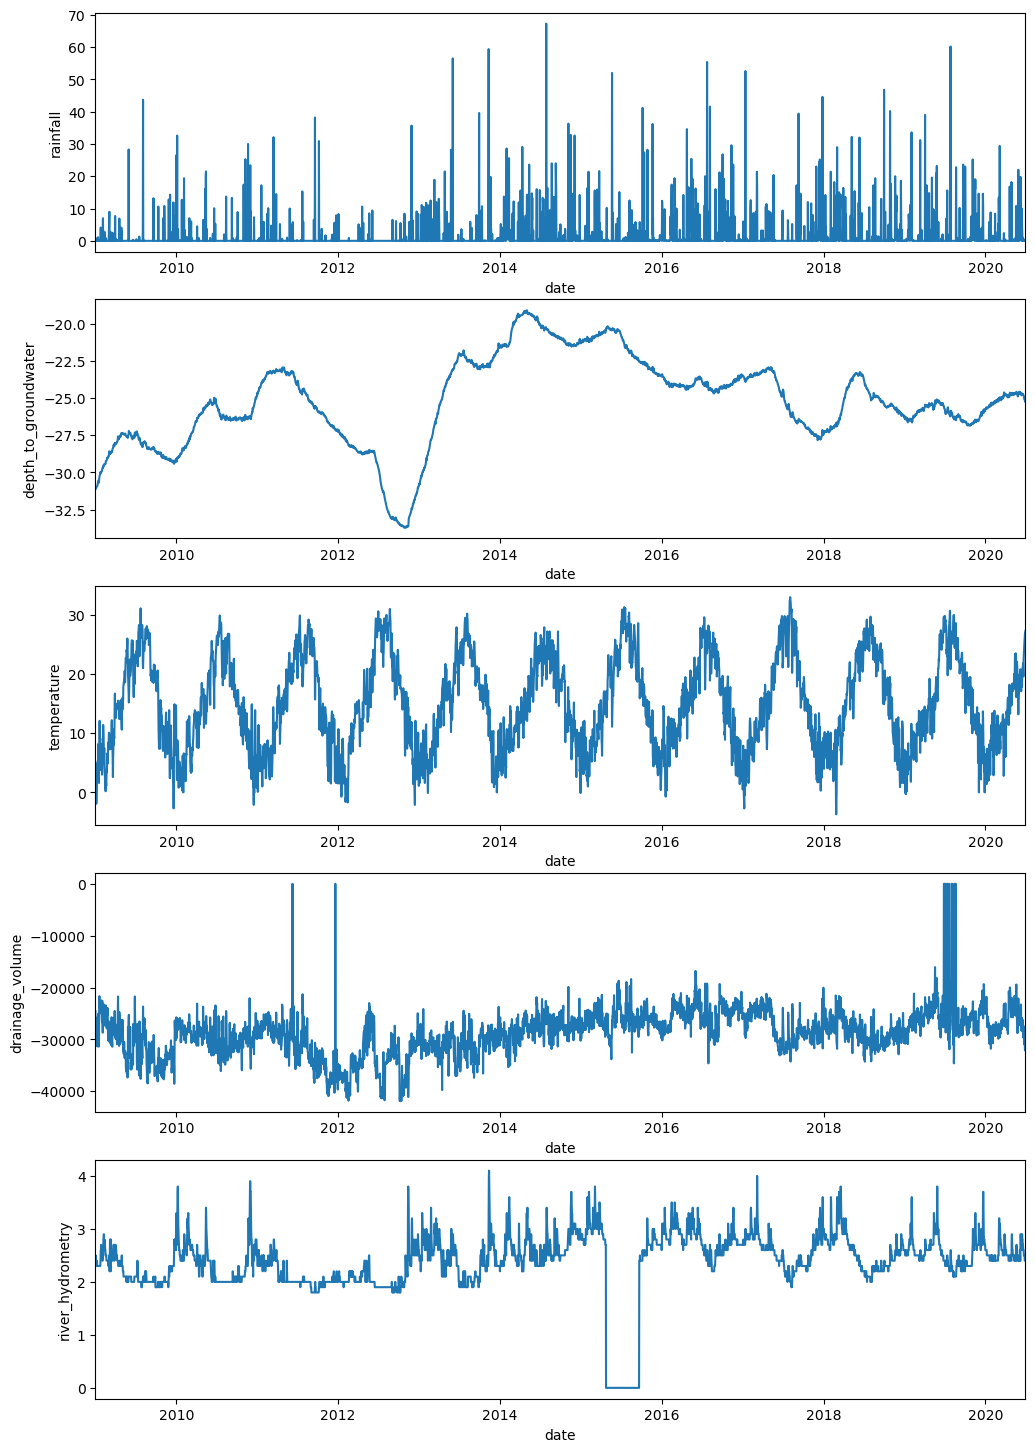

In [91]:
fig, axis = plt.subplots(5, 1, figsize = (12, 18))



sns.lineplot(x = df['date'],
              y = df['rainfall'],
               ax =  axis[0])
axis[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])    


sns.lineplot(x = df['date'],
              y = df['depth_to_groundwater'],
               ax =  axis[1])
axis[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   


sns.lineplot(x = df['date'],
              y = df['temperature'],
               ax =  axis[2])
axis[2].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   


sns.lineplot(x = df['date'],
              y = df['drainage_volume'],
               ax =  axis[3])
axis[3].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   


sns.lineplot(x = df['date'],
              y = df['river_hydrometry'],
               ax =  axis[4])
axis[4].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   

In [92]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0]

num_of_null_var = len(null_var)

print(f"{null_var}\n\nThe number of null variables are {num_of_null_var}")

Series([], dtype: int64)

The number of null variables are 0


(14245.0, 18443.0)

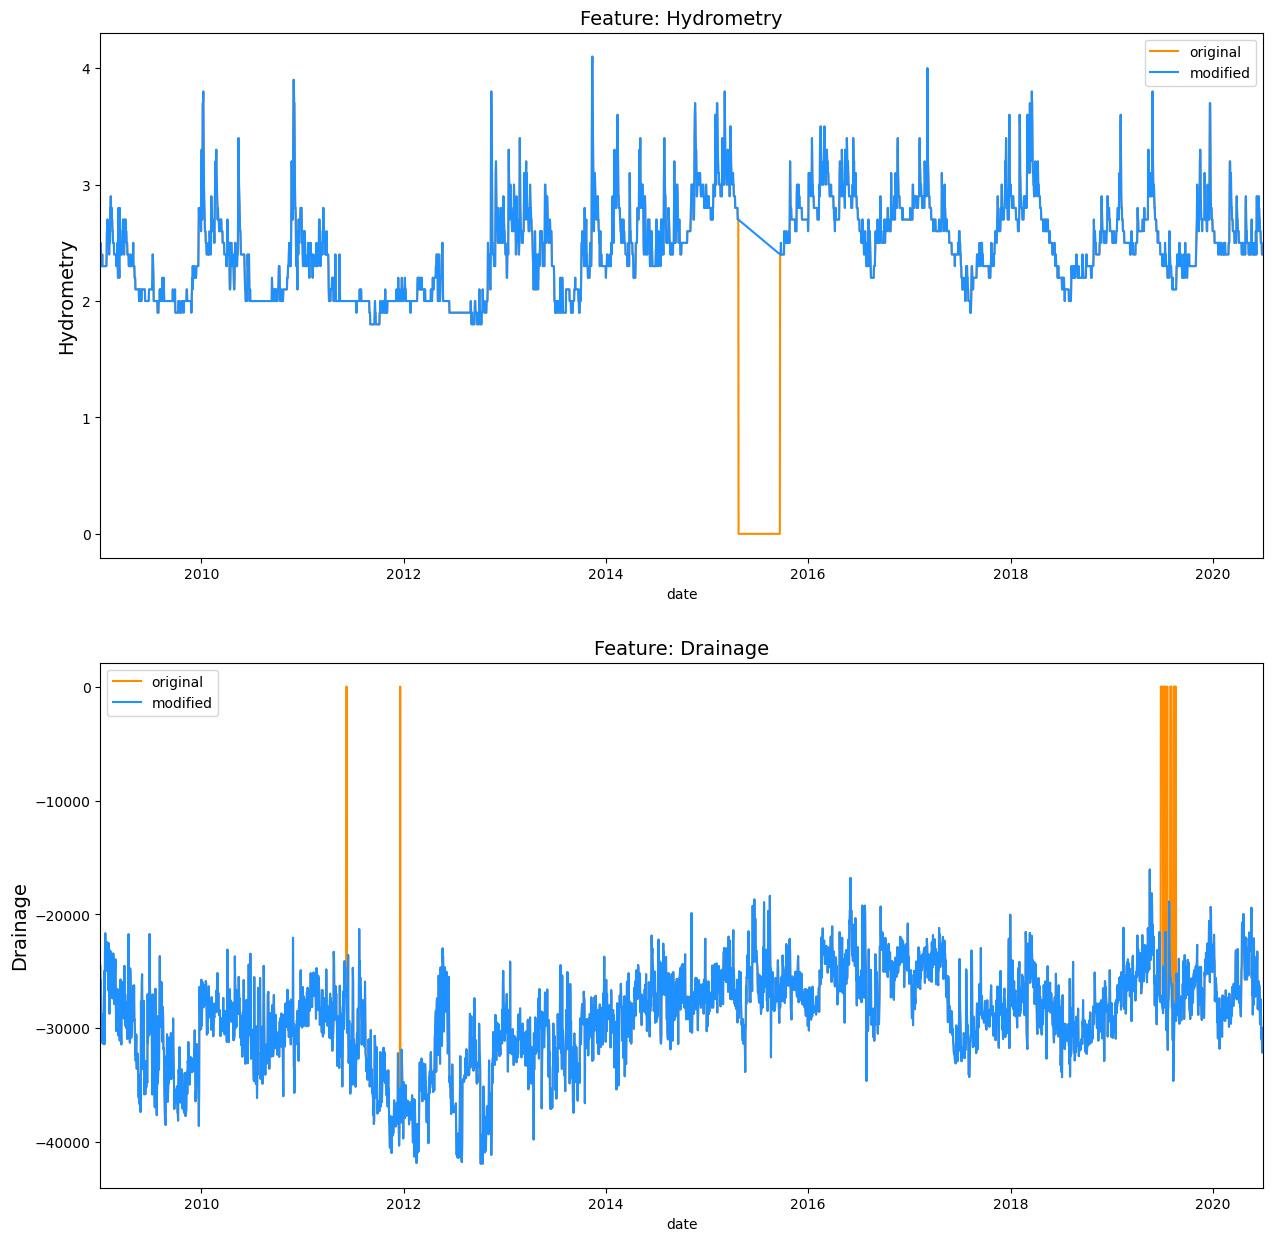

In [93]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

To give you an example regarding the Auser waterbody, if you have data observations until 31.12.2020 (t) and you try to predict the “Depth_to_Groundwater” at date 30.01.2021 (t+1) you are allowed to use all data, also the Depth_to_Groundwater measured in November (t-1), October (t-2), September (t-3) etc.


Please notice also that, if you are willing to predict “Depth_to_Groundwater” at date 28.02.2021(t+2), in order to understand how far the prediction can go, you can use exclusively the given data, this means you cannot include either your estimated “Depth_to_Groundwater” value at 30.01.2021 (t+1) or temperature/rainfall weather predictions for the month of February (t+2).